# Linear Regression with SGD
> Linear Regression from scratch with SGD

- toc: true 
- badges: true
- comments: true
- categories: [Machine Learning]

In case we cannot solve models analytically, we still train models effectively in practice. The algorithm optimize parameters in the direction that incrementally lowvers the loss function is called *gradient descent*.

We will often settle for sampling a random minibatch of examples every time we need to compute the update, a variant called *minibatch stochastic gradient descent*.

In each interation, we first randomly sample a minibatch $\beta$ consisting of a fixed number of training examples. We then compute the gradient of the average loss on the minibatch with regard to the model parameters. Finally, we multiply the gradient by a positive value $\eta$ and subtract the result from the current parameters values.

$$ \mathbf{w} \leftarrow \mathbf{w} - \frac{\eta}{|\mathcal{B}|} \sum_{i \in \mathcal{B}} \partial_{\mathbf{w}} l^{(i)}\mathbf{w}$$



# Generating the Dataset

In [29]:
import tensorflow as tf
import random
import matplotlib.pyplot as plt
%matplotlib inline

In [30]:
def synthetic_data(w, b, num_examples):  
    """Generate y = Xw + b + noise."""
    X = tf.zeros((num_examples, w.shape[0]))
    X += tf.random.normal(shape=X.shape)
    y = tf.matmul(X, tf.reshape(w, (-1, 1))) + b
    y += tf.random.normal(shape=y.shape, stddev=0.01)
    y = tf.reshape(y, (-1, 1))
    return X, y

true_w = tf.constant([2, -3.4])
true_b = 4.2
features, labels = synthetic_data(true_w, true_b, 1000)

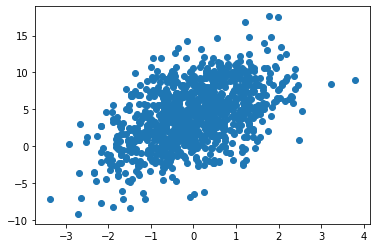

In [31]:
plt.scatter(x=features[:,0].numpy(),y=labels[:,0].numpy())

# Reading the Dataset

In [32]:
def data_iter(batch_size, features, labels):
    num_examples = len(features)
    indices = list(range(num_examples))
    # The examples are read at random, in no particular order
    random.shuffle(indices)
    for i in range(0, num_examples, batch_size):
        j = tf.constant(indices[i: min(i + batch_size, num_examples)])
        yield tf.gather(features, j), tf.gather(labels, j)

# Initalizing the Parameters

In [ ]:
w = tf.